In [1]:
import ROOT
import matplotlib.pyplot as plt 
import numpy as np
from scipy.optimize import curve_fit
import seaborn as sns
import pandas as pd
from ROOT import gStyle, TCanvas, TGraphErrors
from array import array
from scipy.ndimage import gaussian_filter1d

Welcome to JupyROOT 6.26/04


In [2]:
# Open the ROOT file
Path_yj_S = ROOT.TFile.Open("/lapp_data/atlas/perf-egamma/InclusivePhotons/fullRun2/FinalNtuples/Sherpa_GammaJet_mc16a_p3931_Rel21_AB21.2.94_v0.root", "READ")
Path_jj_P8 = ROOT.TFile.Open("/lapp_data/atlas/perf-egamma/InclusivePhotons/fullRun2/FinalNtuples/Py8_jetjet_mc16d_p3929_Rel21_AB21.2.94_v0.root", "READ")
Path_yj_P17 = ROOT.TFile.Open("/lapp_data/atlas/perf-egamma/InclusivePhotons/fullRun2/FinalNtuples/PyPt17_inf_mc16d_p3931_Rel21_AB21.2.94_v0.root", "READ")

# Access the TTree yj
tree_yj_S = Path_yj_S.Get("SinglePhoton")
# Access the TTree jj
tree_jj_P8 = Path_jj_P8.Get("SinglePhoton")
# Access the TTree jj
tree_yj_P17 = Path_yj_P17.Get("SinglePhoton")

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <TCanvas::Print>: pdf file /home1/chardong/Venv/Save_plots_PyROOT/5e6_y_pt_&_Et.pdf has been created


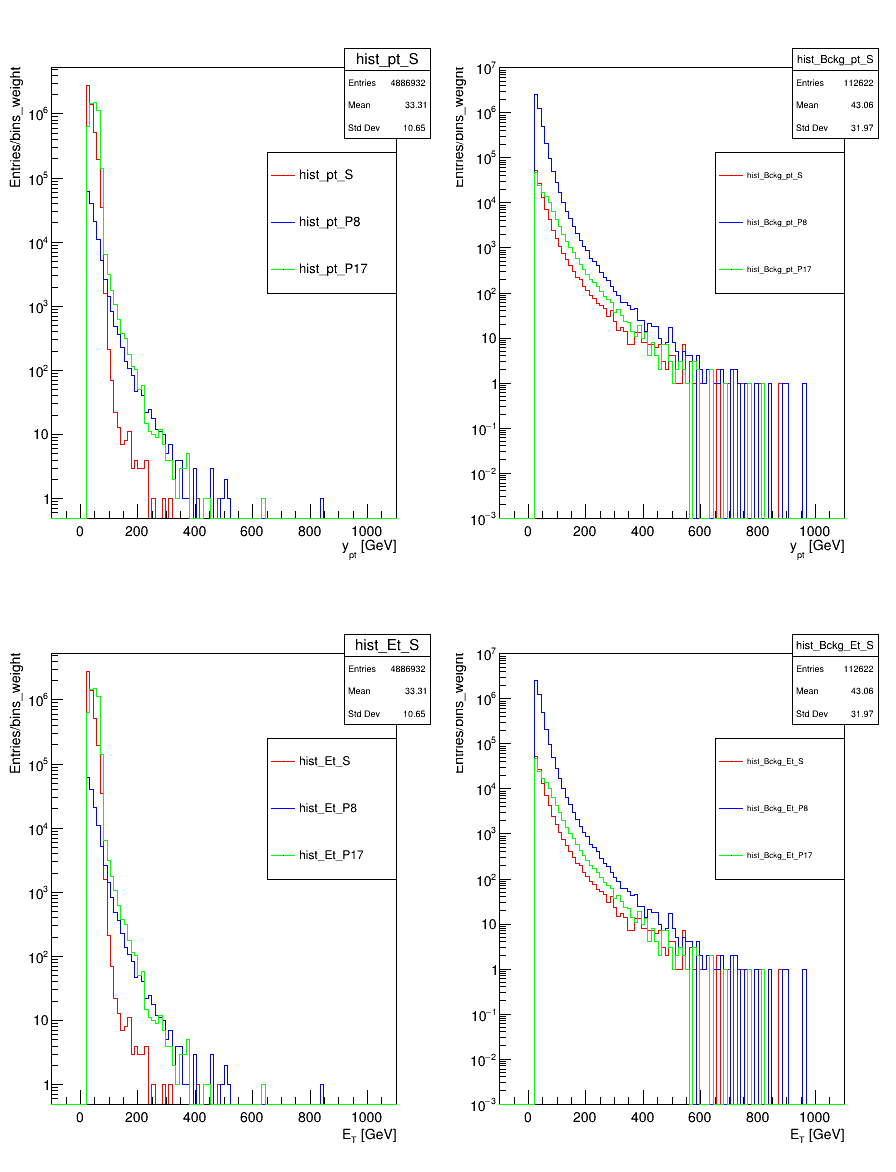

In [3]:
# Delete old files
hist_names = ["hist_pt_S", "hist_pt_P8", "hist_pt_P17", "hist_Bckg_pt_S", "hist_Bckg_pt_P8", "hist_Bckg_pt_P17", "hist_Et_S", "hist_Et_P8", "hist_Et_P17", "hist_Bckg_Et_S", "hist_Bckg_Et_P8", "hist_Bckg_Et_P17"]
for hist_name in hist_names:
    hist = ROOT.gDirectory.Get(hist_name)
    if hist:
        ROOT.gDirectory.Delete(hist_name + ";*")


x, y = -100, 1100  # ranges histograms

#y_pt
hist_pt_S = ROOT.TH1D("hist_pt_S", "Signal_y_pt_S; y_{pt} [GeV]; Entries/bins_weight", 100, x, y)
hist_pt_P8 = ROOT.TH1D("hist_pt_P8", "Signal_y_pt_P8; y_{pt} [GeV]; Entries/bins_weight", 100, x, y)
hist_pt_P17 = ROOT.TH1D("hist_pt_P17", "Signal_y_pt_P17; y_{pt} [GeV]; Entries/bins_weight", 100, x, y)
hist_Bckg_pt_S = ROOT.TH1D("hist_Bckg_pt_S", "Background_y_pt_S; y_{pt} [GeV]; Entries/bins_weight", 100, x, y)
hist_Bckg_pt_P8 = ROOT.TH1D("hist_Bckg_pt_P8", "Background_y_pt_P8; y_{pt} [GeV]; Entries/bins_weight", 100, x, y)
hist_Bckg_pt_P17 = ROOT.TH1D("hist_Bckg_pt_P17", "Background_y_pt_P17; y_{pt} [GeV]; Entries/bins_weight", 100, x, y)
#Et
hist_Et_S = ROOT.TH1D("hist_Et_S", "Signal_Et_S ; E_{T} [GeV]; Entries/bins_weight", 100, x, y)
hist_Et_P8 = ROOT.TH1D("hist_Et_P8", "Signal_Et_P8; E_{T} [GeV]; Entries/bins_weight", 100, x, y)
hist_Et_P17 = ROOT.TH1D("hist_Et_P17", "Signal_Et_P17; E_{T} [GeV]; Entries/bins_weight", 100, x, y)
hist_Bckg_Et_S = ROOT.TH1D("hist_Bckg_Et_S", "Background_Et_S; E_{T} [GeV]; Entries/bins_weight", 100, x, y)
hist_Bckg_Et_P8 = ROOT.TH1D("hist_Bckg_Et_P8", "Background_Et_P8; E_{T} [GeV]; Entries/bins_weight", 100, x, y)
hist_Bckg_Et_P17 = ROOT.TH1D("hist_Bckg_Et_P17", "Background_Et_P17; E_{T} [GeV]; Entries/bins_weight", 100, x, y)



# Normalisation Sgnl
for hist_sgnl in [hist_pt_S, hist_pt_P8, hist_pt_P17, hist_Et_S, hist_Et_P8, hist_Et_P17]:
    integral = hist_sgnl.Integral("width")
    if integral > 0:
        hist_sgnl.Scale(1.0 / integral)
        
# Normalisation Bckg
for hist_bckg in [hist_Bckg_pt_S, hist_Bckg_pt_P8, hist_Bckg_pt_P17, hist_Bckg_Et_S, hist_Bckg_Et_P8, hist_Bckg_Et_P17]:
    integral = hist_bckg.Integral("width")
    if integral > 0:
        hist_bckg.Scale(1.0 / integral)        


#SELECTION
slct_y = ROOT.TCut("(y_truth_pdgId == 22) && (y_truth_mother_pdgId < 100)")
slct_Bckg = ROOT.TCut("(y_truth_pdgId != 11) && ((y_truth_pdgId != 22) || (y_truth_mother_pdgId > 100))")

ENTRIES = 5000000

#Real y
tree_yj_S.Draw("y_pt>>hist_pt_S", slct_y, "", ENTRIES)
tree_yj_S.Draw("y_e/cosh(TMath::Abs(y_eta))>>hist_Et_S", slct_y, "", ENTRIES)
tree_jj_P8.Draw("y_pt>>hist_pt_P8", slct_y, "", ENTRIES)
tree_jj_P8.Draw("y_e/cosh(TMath::Abs(y_eta))>>hist_Et_P8", slct_y, "", ENTRIES)
tree_yj_P17.Draw("y_pt>>hist_pt_P17", slct_y, "", ENTRIES)
tree_yj_P17.Draw("y_e/cosh(TMath::Abs(y_eta))>>hist_Et_P17", slct_y, "", ENTRIES)


#Fake y
tree_yj_S.Draw("y_pt>>hist_Bckg_pt_S", slct_Bckg, "", ENTRIES)
tree_yj_S.Draw("y_e/cosh(TMath::Abs(y_eta))>>hist_Bckg_Et_S", slct_Bckg, "", ENTRIES)
tree_jj_P8.Draw("y_pt>>hist_Bckg_pt_P8", slct_Bckg, "", ENTRIES)
tree_jj_P8.Draw("y_e/cosh(TMath::Abs(y_eta))>>hist_Bckg_Et_P8", slct_Bckg, "", ENTRIES)
tree_yj_P17.Draw("y_pt>>hist_Bckg_pt_P17", slct_Bckg, "", ENTRIES)
tree_yj_P17.Draw("y_e/cosh(TMath::Abs(y_eta))>>hist_Bckg_Et_P17", slct_Bckg, "", ENTRIES)



def draw_hist(pad, hists, labels, colors, title):
    pad.cd()
    legend = ROOT.TLegend(0.1, 0.7, 0.3, 0.9)  # position pour ne pas superposer les histogrammes
    legend.SetHeader(title, "C") 

    # Boucle pour dessiner chaque histogramme avec sa couleur et l'ajouter à la légende
    for hist, label, color in zip(hists, labels, colors):
        hist.SetLineColor(color)
        hist.Draw("HIST SAME")
        legend.AddEntry(hist, label, "l")
    
    legend.Draw()
    pad.Update()

# Initialisation du canvas
c = ROOT.TCanvas("c", "y_pt & Et Distributions", 900, 1200)
c.Divide(2, 2)  # Division en 2x2 pads

# Sélection des pads
pad1 = c.cd(1)
pad2 = c.cd(2)
pad3 = c.cd(3)
pad4 = c.cd(4)

# Assurez-vous que les histogrammes n'ont pas de titre
hist_pt_S.SetTitle("")
hist_pt_P8.SetTitle("")
hist_pt_P17.SetTitle("")
hist_Bckg_pt_S.SetTitle("")
hist_Bckg_pt_P8.SetTitle("")
hist_Bckg_pt_P17.SetTitle("")
hist_Et_S.SetTitle("")
hist_Et_P8.SetTitle("")
hist_Et_P17.SetTitle("")
hist_Bckg_Et_S.SetTitle("")
hist_Bckg_Et_P8.SetTitle("")
hist_Bckg_Et_P17.SetTitle("")

hist_Bckg_pt_S.GetYaxis().SetRangeUser(1e-3, 1e7)
hist_Bckg_pt_P8.GetYaxis().SetRangeUser(1e-3, 1e7)
hist_Bckg_pt_P17.GetYaxis().SetRangeUser(1e-3, 1e7)

hist_Bckg_Et_S.GetYaxis().SetRangeUser(1e-3, 1e7)
hist_Bckg_Et_P8.GetYaxis().SetRangeUser(1e-3, 1e7)
hist_Bckg_Et_P17.GetYaxis().SetRangeUser(1e-3, 1e7)

# Configuration des histogrammes, labels et couleurs pour chaque pad
hists_pad1 = [hist_pt_S, hist_pt_P8, hist_pt_P17]
labels_pad1 = ["Signal_y_pt_S", "Signal_y_pt_P8", "Signal_y_pt_P17"]
colors_pad1 = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen]

hists_pad2 = [hist_Bckg_pt_S, hist_Bckg_pt_P8, hist_Bckg_pt_P17]
labels_pad2 = ["Background_y_pt_S", "Background_y_pt_P8", "Background_y_pt_P17"]
colors_pad2 = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen]

hists_pad3 = [hist_Et_S, hist_Et_P8, hist_Et_P17]
labels_pad3 = ["Signal_Et_S", "Signal_Et_P8", "Signal_Et_P17"]
colors_pad3 = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen]

hists_pad4 = [hist_Bckg_Et_S, hist_Bckg_Et_P8, hist_Bckg_Et_P17]
labels_pad4 = ["Background_Et_S", "Background_Et_P8", "Background_Et_P17"]
colors_pad4 = [ROOT.kRed, ROOT.kBlue, ROOT.kGreen]

# Dessin des histogrammes avec légendes
draw_hist(pad1, hists_pad1, labels_pad1, colors_pad1, "Real y_pt")
pad1.SetLogy(1)
pad1.BuildLegend(0.6, 0.5, 0.9, 0.75)
draw_hist(pad2, hists_pad2, labels_pad2, colors_pad2, "Fake y_pt")  
pad2.SetLogy(1)
pad2.BuildLegend(0.6, 0.5, 0.9, 0.75)
draw_hist(pad3, hists_pad3, labels_pad3, colors_pad3, "Real Et")
pad3.SetLogy(1)
pad3.BuildLegend(0.6, 0.5, 0.9, 0.75)
draw_hist(pad4, hists_pad4, labels_pad4, colors_pad4, "Fake Et")
pad4.SetLogy(1)
pad4.BuildLegend(0.6, 0.5, 0.9, 0.75)

# Mise à jour et affichage du canvas
c.Update()
c.Draw()

# Sauvegarde du canvas en PDF
c.SaveAs("/home1/chardong/Venv/Save_plots_PyROOT/5e6_y_pt_&_Et.pdf")
